<a href="https://colab.research.google.com/github/shivendr7/ml/blob/main/UsingCustomFilterInCNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
import keras.backend as K
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [4]:
(train_images,_),(_,_)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
def myfilter(shape, dtype=None):
  f=np.array([
      [[[1]],[[0]],[[-1]]],
      [[[1]],[[0]],[[-1]]],
      [[[1]],[[0]],[[-1]]]
  ])
  return K.variable(f, dtype='float32')

inp=Input(shape=(28,28,1))
out=Conv2D(filters=1, kernel_size=(3,3), padding='same', kernel_initializer=myfilter)(inp)
model=Model(inputs=inp, outputs=out)
model.compile()

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 1)         10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [8]:
X=np.expand_dims(train_images, axis=-1)

In [10]:
out=model.predict(train_images[:5])

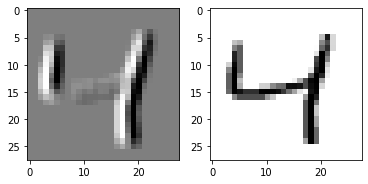

In [15]:
i=2
plt.subplot(1,2,1)
plt.imshow(out[i].reshape(28,28), cmap='gray_r')
plt.subplot(1,2,2)
plt.imshow(train_images[i], cmap='gray_r')